###Luxury Housing Sales Analysis – Bengaluru

This notebook performs exploratory data analysis (EDA) on a real estate
dataset to understand pricing trends, locality performance, buyer behavior,
and amenity impact. The analysis supports business decision-making using data.


In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("classic")


In [28]:
# Load dataset
df = pd.read_csv("Luxury_Housing_Bangalore.csv")

# Basic check
df.shape


(101000, 18)

In [29]:
df.head()


,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,2024-06-30,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [30]:
# Number of duplicate rows
df.duplicated().sum()


np.int64(1000)

In [31]:
#check dupilicates

df[df.duplicated()]

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
100000,PROP036224,DOMLUR,Project_223,Embassy,4608.0,5bhk+,6.567529360287568,Secondary,HNI,2024-09-30,8.810723,8.286767,Launch,Broker,yes,9.291593,74,NaN
100001,PROP018298,Domlur,Project_297,Tata Housing,7455.0,5BHK+,NaN,Primary,Other,2024-12-31,4.173285,8.759681,Launch,Online,yes,8.447694,28,Great view from 15th floor.
100002,PROP084496,rajajinagar,Project_495,Prestige,3778.0,4bhk,12.568326856995945,Secondary,NRI,2023-12-31,9.366757,9.049776,Under construction,Broker,no,9.806097,92,Excellent location!
100003,PROP065620,DOMLUR,Project_119,Brigade,NaN,4BHK,₹12.59 Cr,Secondary,Startup Founder,2024-12-31,7.266646,5.718584,Launch,NRI Desk,yes,5.206301,88,Too far from my office.
100004,PROP088229,WHITEFIELD,Project_228,Total Environment,7458.0,4BHK,13.713149406825654,Secondary,HNI,2023-09-30,7.539427,7.310738,Ready to move,Direct,yes,6.533569,69,Connectivity is poor.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,PROP004730,BELLARY ROAD,Project_229,Embassy,8546.0,5Bhk+,11.33081004147843,Secondary,CXO,2024-12-31,8.552797,6.221131,Under construction,NRI Desk,no,7.511827,22,Will buy after possession.
100996,PROP059810,Bellary Road,Project_309,Brigade,3408.0,3bhk,10.829373158307602,Primary,CXO,2024-09-30,6.879269,9.783611,Ready to move,Direct,no,9.851849,26,Agent was not responsive.
100997,PROP065099,HENNUR ROAD,Project_98,RMZ,4691.0,4BHK,11.183303152058548,Primary,NRI,2023-12-31,6.753812,8.383013,Under construction,Broker,no,9.101604,44,Loved the amenities!
100998,PROP093022,rajajinagar,Project_21,Embassy,7435.0,3BHK,10.914156376035923,Secondary,Other,2024-06-30,4.437787,5.756247,Under construction,Broker,yes,8.588551,66,Excellent location!


In [32]:
# drop duplicates

df = df.drop_duplicates()


In [33]:
df.shape

(100000, 18)

In [34]:
df.Micro_Market.unique()

array(['Sarjapur Road', 'Indiranagar', 'Bannerghatta Road',
       'bellary road', 'Koramangala', 'YELAHANKA', 'whitefield',
       'sarjapur road', 'JP NAGAR', 'Rajajinagar', 'koramangala',
       'WHITEFIELD', 'indiranagar', 'jayanagar', 'Whitefield', 'DOMLUR',
       'yelahanka', 'Mg Road', 'HENNUR ROAD', 'Jayanagar', 'Domlur',
       'Electronic City', 'Hebbal', 'mg road', 'jp nagar',
       'BANNERGHATTA ROAD', 'MG ROAD', 'KANAKAPURA ROAD', 'HEBBAL',
       'BELLARY ROAD', 'electronic city', 'ELECTRONIC CITY',
       'Bellary Road', 'Hennur Road', 'rajajinagar', 'Kanakapura Road',
       'INDIRANAGAR', 'hennur road', 'kanakapura road', 'domlur',
       'bannerghatta road', 'RAJAJINAGAR', 'hebbal', 'Yelahanka',
       'SARJAPUR ROAD', 'KORAMANGALA', 'Jp Nagar', 'JAYANAGAR'],
      dtype=object)

In [35]:
df["Micro_Market"].nunique()


48

In [36]:
df["Micro_Market"].value_counts()

Micro_Market
Jayanagar            2157
Bannerghatta Road    2148
mg road              2144
Jp Nagar             2143
bannerghatta road    2137
jp nagar             2136
sarjapur road        2135
indiranagar          2127
SARJAPUR ROAD        2125
domlur               2124
WHITEFIELD           2124
jayanagar            2119
Sarjapur Road        2113
JAYANAGAR            2103
bellary road         2101
Electronic City      2099
MG ROAD              2098
JP NAGAR             2094
hennur road          2091
yelahanka            2090
BANNERGHATTA ROAD    2089
Kanakapura Road      2088
kanakapura road      2088
Yelahanka            2087
Hebbal               2083
Indiranagar          2078
RAJAJINAGAR          2077
Whitefield           2073
whitefield           2071
Rajajinagar          2070
ELECTRONIC CITY      2070
BELLARY ROAD         2062
rajajinagar          2060
KANAKAPURA ROAD      2059
INDIRANAGAR          2058
Hennur Road          2057
KORAMANGALA          2052
Bellary Road         2052

In [37]:
# CHANGE THE NAME IN TITLE FUNCTION USED BECAUSE TWO TIME PRESENT IN SAME NAME 
df["Micro_Market"] = df["Micro_Market"].str.strip().str.title()


In [38]:
df["Micro_Market"].nunique()


16

In [39]:
df["Micro_Market"].value_counts()

Micro_Market
Jayanagar            6379
Bannerghatta Road    6374
Jp Nagar             6373
Sarjapur Road        6373
Mg Road              6284
Whitefield           6268
Indiranagar          6263
Kanakapura Road      6235
Bellary Road         6215
Yelahanka            6213
Electronic City      6212
Rajajinagar          6207
Domlur               6181
Hebbal               6172
Hennur Road          6158
Koramangala          6093
Name: count, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           100000 non-null  object 
 1   Micro_Market          100000 non-null  object 
 2   Project_Name          100000 non-null  object 
 3   Developer_Name        100000 non-null  object 
 4   Unit_Size_Sqft        90043 non-null   float64
 5   Configuration         100000 non-null  object 
 6   Ticket_Price_Cr       90087 non-null   object 
 7   Transaction_Type      100000 non-null  object 
 8   Buyer_Type            100000 non-null  object 
 9   Purchase_Quarter      100000 non-null  object 
 10  Connectivity_Score    100000 non-null  float64
 11  Amenity_Score         90000 non-null   float64
 12  Possession_Status     100000 non-null  object 
 13  Sales_Channel         100000 non-null  object 
 14  NRI_Buyer             100000 non-null  object 
 15  Locali

In [41]:
df.isnull().sum()

Property_ID                 0
Micro_Market                0
Project_Name                0
Developer_Name              0
Unit_Size_Sqft           9957
Configuration               0
Ticket_Price_Cr          9913
Transaction_Type            0
Buyer_Type                  0
Purchase_Quarter            0
Connectivity_Score          0
Amenity_Score           10000
Possession_Status           0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
Buyer_Comments          18099
dtype: int64

In [42]:
df["Ticket_Price_Cr"].head(10)

0    12.750846039118798
1    16.292151871065954
2    10.517724412961911
3     9.396367494232896
4    15.345392444511946
5              ₹9.82 Cr
6    10.896752354445224
7     9.357538943683888
8    12.299449409872416
9     9.193310278863123
Name: Ticket_Price_Cr, dtype: object

In [43]:
def clean_price(value):
    value = str(value).lower().strip()
    value = value.replace("₹", "")      # remove rupee symbol
    value = value.replace("crore", "")
    value = value.replace("cr", "")
    return float(value)
df["Ticket_Price_Cr"] = df["Ticket_Price_Cr"].apply(clean_price)

In [44]:
df["Ticket_Price_Cr"].dtype


dtype('float64')

In [45]:
df.isnull().sum()


Property_ID                 0
Micro_Market                0
Project_Name                0
Developer_Name              0
Unit_Size_Sqft           9957
Configuration               0
Ticket_Price_Cr          9913
Transaction_Type            0
Buyer_Type                  0
Purchase_Quarter            0
Connectivity_Score          0
Amenity_Score           10000
Possession_Status           0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
Buyer_Comments          18099
dtype: int64

In [46]:
df["Ticket_Price_Cr"].describe()


count    90087.000000
mean        12.719069
std          7.670383
min         -1.420000
25%         10.010969
50%         12.038456
75%         14.097009
max        100.000000
Name: Ticket_Price_Cr, dtype: float64

In [49]:
# Step 1: Treat invalid (<=0) ticket prices as missing
df.loc[df["Ticket_Price_Cr"] <= 0, "Ticket_Price_Cr"] = np.nan


In [51]:
# Step 2: Fill missing ticket prices with median

df["Ticket_Price_Cr"] = df["Ticket_Price_Cr"].fillna(
    df["Ticket_Price_Cr"].median()
)


In [52]:
# Cap extreme outliers
upper_cap = df["Ticket_Price_Cr"].quantile(0.99)
df["Ticket_Price_Cr_Capped"] = df["Ticket_Price_Cr"].clip(upper=upper_cap)

In [53]:
df["Ticket_Price_Cr"].describe()

count    100000.000000
mean         12.652246
std           7.282516
min           0.660000
25%          10.265189
50%          12.038619
75%          13.832409
max         100.000000
Name: Ticket_Price_Cr, dtype: float64

In [56]:
df["Amenity_Score"].describe()

count    90000.000000
mean         7.504185
std          1.440567
min          5.000224
25%          6.261394
50%          7.499766
75%          8.752300
max          9.999865
Name: Amenity_Score, dtype: float64

In [57]:

df["Amenity_Score"].isnull().sum()


np.int64(10000)

In [59]:
df["Amenity_Score"] = df["Amenity_Score"].fillna(
    df["Amenity_Score"].median()
)


In [60]:
df.isnull().sum()


Property_ID                   0
Micro_Market                  0
Project_Name                  0
Developer_Name                0
Unit_Size_Sqft             9957
Configuration                 0
Ticket_Price_Cr               0
Transaction_Type              0
Buyer_Type                    0
Purchase_Quarter              0
Connectivity_Score            0
Amenity_Score                 0
Possession_Status             0
Sales_Channel                 0
NRI_Buyer                     0
Locality_Infra_Score          0
Avg_Traffic_Time_Min          0
Buyer_Comments            18099
Ticket_Price_Cr_Capped        0
dtype: int64

In [61]:
df["Unit_Size_Sqft"].describe()


count    90043.000000
mean      5972.040170
std       1783.226054
min         -1.000000
25%       4478.000000
50%       5990.000000
75%       7497.000000
max       8999.000000
Name: Unit_Size_Sqft, dtype: float64

In [62]:
# Treat invalid (<=0) unit sizes as missing
df.loc[df["Unit_Size_Sqft"] <= 0, "Unit_Size_Sqft"] = np.nan


In [63]:
df["Unit_Size_Sqft"] = df["Unit_Size_Sqft"].fillna(
    df["Unit_Size_Sqft"].median()
)


In [64]:
df["Unit_Size_Sqft"].describe()


count    100000.000000
mean       6005.247410
std        1638.257026
min        3000.000000
25%        4683.000000
50%        6004.000000
75%        7332.000000
max        8999.000000
Name: Unit_Size_Sqft, dtype: float64

In [66]:
df["Price_per_Sqft"] = (df["Ticket_Price_Cr_Capped"] * 1e7) / df["Unit_Size_Sqft"]



In [67]:
df["Price_per_Sqft"].describe()


count    100000.000000
mean      21963.310999
std        8954.983064
min         995.619275
25%       15626.126874
50%       20050.997619
75%       26533.874922
max       80065.353937
Name: Price_per_Sqft, dtype: float64

In [68]:
upper_cap = df["Price_per_Sqft"].quantile(0.99)
df["Price_per_Sqft_Capped"] = df["Price_per_Sqft"].clip(upper=upper_cap)


In [69]:
df["Price_per_Sqft_Capped"].describe()


count    100000.000000
mean      21897.829308
std        8703.039770
min         995.619275
25%       15626.126874
50%       20050.997619
75%       26533.874922
max       49185.908341
Name: Price_per_Sqft_Capped, dtype: float64

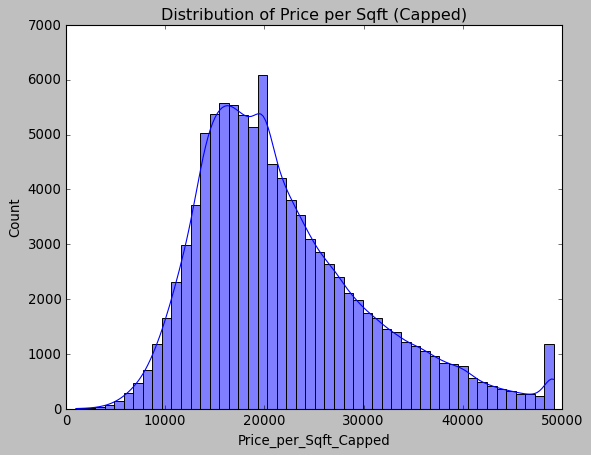

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Price_per_Sqft_Capped

sns.histplot(df["Price_per_Sqft_Capped"], bins=50, kde=True)
plt.title("Distribution of Price per Sqft (Capped)")
plt.show()



### Insight:
     Price per square foot shows a right-skewed distribution, with most properties clustered around the median price range.


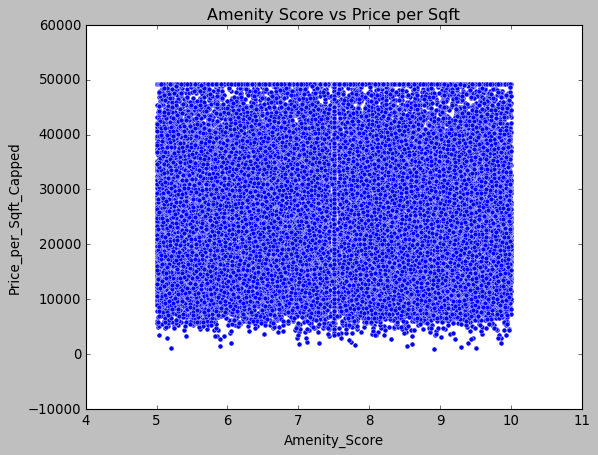

In [74]:
#Scatter: Amenity_Score vs Price_per_Sqft_Capped

sns.scatterplot(
    x="Amenity_Score",
    y="Price_per_Sqft_Capped",
    data=df
)
plt.title("Amenity Score vs Price per Sqft")
plt.show()


### Insight:
    Higher amenity scores are generally associated with higher price per square foot, indicating a positive relationship.


In [77]:
df.isnull().sum()

Property_ID                   0
Micro_Market                  0
Project_Name                  0
Developer_Name                0
Unit_Size_Sqft                0
Configuration                 0
Ticket_Price_Cr               0
Transaction_Type              0
Buyer_Type                    0
Purchase_Quarter              0
Connectivity_Score            0
Amenity_Score                 0
Possession_Status             0
Sales_Channel                 0
NRI_Buyer                     0
Locality_Infra_Score          0
Avg_Traffic_Time_Min          0
Buyer_Comments            18099
Ticket_Price_Cr_Capped        0
Price_per_Sqft                0
Price_per_Sqft_Capped         0
dtype: int64

In [78]:
# comments fill no comments 

df["Buyer_Comments"] = df["Buyer_Comments"].fillna("No Comment")



In [79]:
df.isnull().sum()

Property_ID               0
Micro_Market              0
Project_Name              0
Developer_Name            0
Unit_Size_Sqft            0
Configuration             0
Ticket_Price_Cr           0
Transaction_Type          0
Buyer_Type                0
Purchase_Quarter          0
Connectivity_Score        0
Amenity_Score             0
Possession_Status         0
Sales_Channel             0
NRI_Buyer                 0
Locality_Infra_Score      0
Avg_Traffic_Time_Min      0
Buyer_Comments            0
Ticket_Price_Cr_Capped    0
Price_per_Sqft            0
Price_per_Sqft_Capped     0
dtype: int64

In [80]:
df.dtypes

Property_ID                object
Micro_Market               object
Project_Name               object
Developer_Name             object
Unit_Size_Sqft            float64
Configuration              object
Ticket_Price_Cr           float64
Transaction_Type           object
Buyer_Type                 object
Purchase_Quarter           object
Connectivity_Score        float64
Amenity_Score             float64
Possession_Status          object
Sales_Channel              object
NRI_Buyer                  object
Locality_Infra_Score      float64
Avg_Traffic_Time_Min        int64
Buyer_Comments             object
Ticket_Price_Cr_Capped    float64
Price_per_Sqft            float64
Price_per_Sqft_Capped     float64
dtype: object

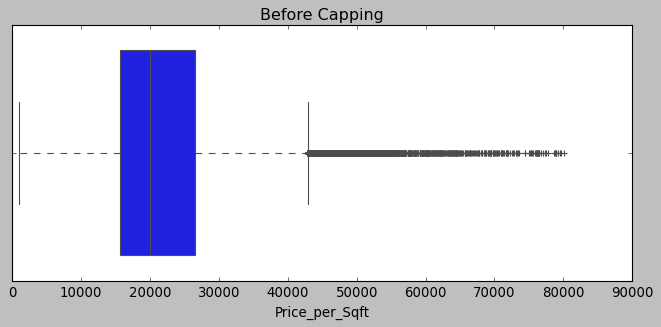

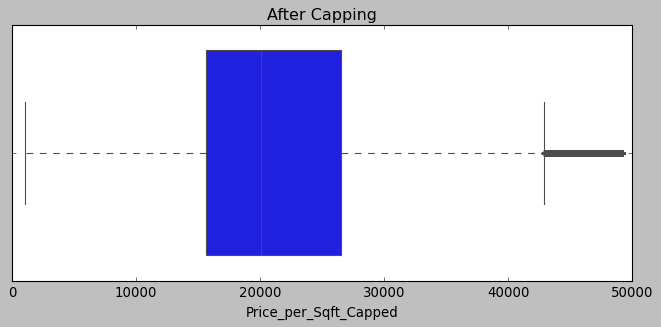

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.boxplot(x=df["Price_per_Sqft"])
plt.title("Before Capping")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df["Price_per_Sqft_Capped"])
plt.title("After Capping")
plt.show()


In [ ]:
### Outlier Treatment Validation – Price per Sqft

The boxplots below compare price per square foot before and after
outlier capping to ensure extreme values are controlled without
distorting the central distribution.


In [84]:
df.isnull().sum()

Property_ID               0
Micro_Market              0
Project_Name              0
Developer_Name            0
Unit_Size_Sqft            0
Configuration             0
Ticket_Price_Cr           0
Transaction_Type          0
Buyer_Type                0
Purchase_Quarter          0
Connectivity_Score        0
Amenity_Score             0
Possession_Status         0
Sales_Channel             0
NRI_Buyer                 0
Locality_Infra_Score      0
Avg_Traffic_Time_Min      0
Buyer_Comments            0
Ticket_Price_Cr_Capped    0
Price_per_Sqft            0
Price_per_Sqft_Capped     0
dtype: int64

In [85]:
df.to_csv("luxury_housing_cleaned.csv", index=False)


In [86]:
df = pd.read_csv("luxury_housing_cleaned.csv")

# Basic check
df.shape

(100000, 21)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Property_ID             100000 non-null  object 
 1   Micro_Market            100000 non-null  object 
 2   Project_Name            100000 non-null  object 
 3   Developer_Name          100000 non-null  object 
 4   Unit_Size_Sqft          100000 non-null  float64
 5   Configuration           100000 non-null  object 
 6   Ticket_Price_Cr         100000 non-null  float64
 7   Transaction_Type        100000 non-null  object 
 8   Buyer_Type              100000 non-null  object 
 9   Purchase_Quarter        100000 non-null  object 
 10  Connectivity_Score      100000 non-null  float64
 11  Amenity_Score           100000 non-null  float64
 12  Possession_Status       100000 non-null  object 
 13  Sales_Channel           100000 non-null  object 
 14  NRI_Buyer            

In [88]:
import pyodbc

conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=GOPAL\\SQLEXPRESS;"
    "Database=RealEstateDB;"
    "Trusted_Connection=yes;"
)

cursor = conn.cursor()
print("CONNECTED SUCCESSFULLY")


CONNECTED SUCCESSFULLY


In [91]:
cursor.execute("""
IF NOT EXISTS (SELECT * FROM sysobjects 
               WHERE name='RealEstate_Data' AND xtype='U')
BEGIN
CREATE TABLE RealEstate_Data (
    Property_ID VARCHAR(50),
    Micro_Market VARCHAR(100),
    Project_Name VARCHAR(200),
    Developer_Name VARCHAR(200),
    Unit_Size_Sqft FLOAT,
    Configuration VARCHAR(50),
    Ticket_Price_Cr FLOAT,
    Transaction_Type VARCHAR(50),
    Buyer_Type VARCHAR(50),
    Purchase_Quarter VARCHAR(20),
    Connectivity_Score FLOAT,
    Amenity_Score FLOAT,
    Possession_Status VARCHAR(50),
    Sales_Channel VARCHAR(50),
    NRI_Buyer VARCHAR(10),
    Locality_Infra_Score FLOAT,
    Avg_Traffic_Time_Min INT,
    Buyer_Comments VARCHAR(500),
    Ticket_Price_Cr_Capped FLOAT,
    Price_per_Sqft FLOAT,
    Price_per_Sqft_Capped FLOAT
);


END
""")

conn.commit()

In [93]:
insert_query = """
INSERT INTO RealEstate_Data (
    Property_ID,
    Micro_Market,
    Project_Name,
    Developer_Name,
    Unit_Size_Sqft,
    Configuration,
    Ticket_Price_Cr,
    Transaction_Type,
    Buyer_Type,
    Purchase_Quarter,
    Connectivity_Score,
    Amenity_Score,
    Possession_Status,
    Sales_Channel,
    NRI_Buyer,
    Locality_Infra_Score,
    Avg_Traffic_Time_Min,
    Buyer_Comments,
    Ticket_Price_Cr_Capped,
    Price_per_Sqft,
    Price_per_Sqft_Capped
)
VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
"""

data = [tuple(row) for row in df.itertuples(index=False, name=None)]

cursor.executemany(insert_query, data)
conn.commit()

print("DATA INSERTED SUCCESSFULLY INTO RealEstate_Data")


DATA INSERTED SUCCESSFULLY INTO RealEstate_Data


In [94]:
cursor.execute("SELECT COUNT(*) FROM RealEstate_Data")
print(cursor.fetchone())


(100000,)
